# Предсказание ротамеров угла $\chi_1$ в зависимости от окружения

In [ ]:
import json
import pandas as pd
import numpy as np

## Запустите следующую клетку. Будет случайно выбрана аминокислота, для которой вы будете проводить исследование

In [ ]:
amacid_names = ['ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'HIS', 'ILE', 'LEU',
                'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

print(f"Моя аминокислота - {np.random.choice(amacid_names)}")

Моя аминокислота - LYS


## Загрузите <a href="https://yadi.sk/d/FeLl5KYfjbhHgA?w=1">отсюда</a> соответствующий файл. Далее мы будем работать с ним.

# Часть 1. Анализ значений угла $\chi_1$

## Задание 1.1. Откроем загруженный файл. Посмотрим на колонки:

In [ ]:
dpath = "CYS_data.csv"

In [ ]:
df = pd.read_csv(dpath)

In [ ]:
df.head()

,Unnamed: 0,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,0,2BO5,-86.289060,80.129109,99.465397,124.766781,117,2,-,1,...,61.204178,14.393570,78.214955,98.855541,20.018496,73.503805,109.185533,14.096429,75.073150,78.408270
1,1,4ME2,-77.957307,111.602981,104.424973,-131.464192,156,37,-,0,...,126.266483,29.282810,81.599245,62.559622,49.301163,61.707781,54.498715,71.325172,157.876790,76.945032
2,2,4MFI,-143.098602,122.209238,125.463285,-148.405833,271,131,-,0,...,57.415362,45.760690,55.458920,44.428799,18.474128,57.678291,98.011131,64.440909,99.855009,118.466435
3,3,4MGS,-160.161311,158.165350,144.003350,-98.027769,37,103,E,0,...,155.553624,77.846412,34.608278,56.152167,42.175209,49.241969,122.582962,65.583217,114.697208,48.315392
4,4,4MHP,-107.953693,143.417571,129.873796,143.114974,68,257,E,0,...,59.266282,62.025918,127.105162,59.040101,24.055904,60.401098,105.420630,66.244386,144.051586,87.993983


Эта таблица содержит информацию о сэмплах одной аминокислоты. Для каждого сэмпла известны:
- Значения всех двугранных углов $\chi$;
- Значения $\phi, \psi, \alpha$ (двугранный угол, построенный по 4 последовательным атомам $C_\alpha$);
- Данные о 17 ближайших пространственных соседях:
    - $\phi, \psi$;
    - Названия аминокислот;
    - Расстояние до целевой аминокислоты по $C_\alpha$;
    - Химические / физикохимические характеристики соседа: группы и точные значения некоторых характеристик;
    - Дополнительные геометрические характеристики (относительно целевой аминокислоты).

## Задание 1.2. Постройте гистограмму значений $\chi_1$ из этой таблицы. Какие ротамеры выделяются на этой гистограмме?

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = df[~np.isnan(df["chi_1"])]

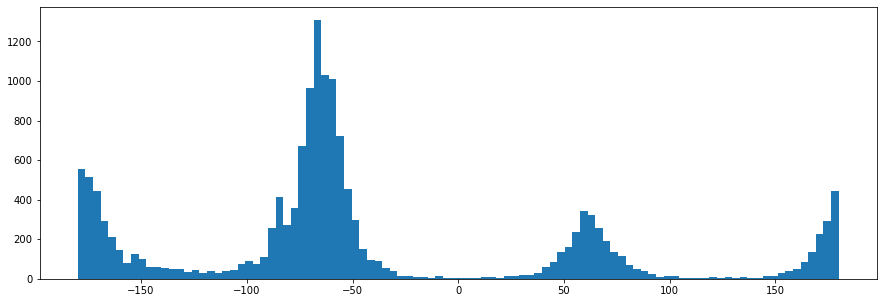

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(df["chi_1"], bins=100)
plt.show()

Занесите обнаруженные ротамеры в список rotamers:

In [ ]:
rotamers = np.array([60, -60, 180])

In [ ]:
df

,Unnamed: 0,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,0,2BO5,-86.289060,80.129109,99.465397,124.766781,117,2,-,1,...,61.204178,14.393570,78.214955,98.855541,20.018496,73.503805,109.185533,14.096429,75.073150,78.408270
1,1,4ME2,-77.957307,111.602981,104.424973,-131.464192,156,37,-,0,...,126.266483,29.282810,81.599245,62.559622,49.301163,61.707781,54.498715,71.325172,157.876790,76.945032
2,2,4MFI,-143.098602,122.209238,125.463285,-148.405833,271,131,-,0,...,57.415362,45.760690,55.458920,44.428799,18.474128,57.678291,98.011131,64.440909,99.855009,118.466435
3,3,4MGS,-160.161311,158.165350,144.003350,-98.027769,37,103,E,0,...,155.553624,77.846412,34.608278,56.152167,42.175209,49.241969,122.582962,65.583217,114.697208,48.315392
4,4,4MHP,-107.953693,143.417571,129.873796,143.114974,68,257,E,0,...,59.266282,62.025918,127.105162,59.040101,24.055904,60.401098,105.420630,66.244386,144.051586,87.993983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15463,15463,6F4C,-106.276671,-167.476352,128.447587,-73.426788,247,115,S,0,...,68.856722,79.043717,85.993414,153.820477,19.282679,35.301877,95.432831,136.966767,151.772145,75.810080
15464,15464,6F4C,-145.828318,165.620016,146.456928,-133.776186,354,8,E,0,...,148.896375,31.947762,38.006489,119.390436,43.677530,28.470389,61.738046,32.592963,58.648027,60.712472
15465,15465,5X1X,-132.797209,141.296308,131.619612,173.489822,19,110,-,0,...,77.975174,24.713154,120.899457,113.611058,36.725367,97.409180,104.977890,108.753332,105.260271,45.556716
15466,15466,5X1X,-129.178042,179.085830,139.469126,-109.381260,59,70,S,0,...,100.318615,61.896144,136.217659,124.571258,57.396081,150.623348,78.470848,59.571626,56.132400,127.175390


## Задание 1.3. Давайте разберемся, как можно дискретизировать значения (разделить их на классы). Реализуйте функцию get_class(value, rotamers), которая возвращает индекс ротамера, к которому относится значение value.

**Комментарий**: стоит вычислять расстояние от value до каждого значения из rotamers. Но не забудьте, что с точки зрения окружности $-\pi$ и $\pi$ - одно и то же!

In [ ]:
def get_class(value, rotamers):
    diffs = np.abs(value - rotamers)
    diffs = np.minimum(diffs, 360 - diffs)
    return np.argmin(diffs)

In [ ]:
def get_class(value, rotamers):
    diffs = np.abs(value - rotamers)
    diffs = np.minimum(diffs, 360 - diffs)
    return np.argmin(diffs)
chi_class = []
for val in df["chi_1"]:
    chi_class += [get_class(val, rotamers)]
df.insert(1, 'chi_class', chi_class, allow_duplicates = False)

In [ ]:
df

,Unnamed: 0,chi_class,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,0,0,2BO5,-86.289060,80.129109,99.465397,124.766781,117,2,-,...,61.204178,14.393570,78.214955,98.855541,20.018496,73.503805,109.185533,14.096429,75.073150,78.408270
1,1,2,4ME2,-77.957307,111.602981,104.424973,-131.464192,156,37,-,...,126.266483,29.282810,81.599245,62.559622,49.301163,61.707781,54.498715,71.325172,157.876790,76.945032
2,2,2,4MFI,-143.098602,122.209238,125.463285,-148.405833,271,131,-,...,57.415362,45.760690,55.458920,44.428799,18.474128,57.678291,98.011131,64.440909,99.855009,118.466435
3,3,0,4MGS,-160.161311,158.165350,144.003350,-98.027769,37,103,E,...,155.553624,77.846412,34.608278,56.152167,42.175209,49.241969,122.582962,65.583217,114.697208,48.315392
4,4,1,4MHP,-107.953693,143.417571,129.873796,143.114974,68,257,E,...,59.266282,62.025918,127.105162,59.040101,24.055904,60.401098,105.420630,66.244386,144.051586,87.993983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15463,15463,0,6F4C,-106.276671,-167.476352,128.447587,-73.426788,247,115,S,...,68.856722,79.043717,85.993414,153.820477,19.282679,35.301877,95.432831,136.966767,151.772145,75.810080
15464,15464,0,6F4C,-145.828318,165.620016,146.456928,-133.776186,354,8,E,...,148.896375,31.947762,38.006489,119.390436,43.677530,28.470389,61.738046,32.592963,58.648027,60.712472
15465,15465,2,5X1X,-132.797209,141.296308,131.619612,173.489822,19,110,-,...,77.975174,24.713154,120.899457,113.611058,36.725367,97.409180,104.977890,108.753332,105.260271,45.556716
15466,15466,2,5X1X,-129.178042,179.085830,139.469126,-109.381260,59,70,S,...,100.318615,61.896144,136.217659,124.571258,57.396081,150.623348,78.470848,59.571626,56.132400,127.175390


In [ ]:
chi_class = []
for val in df["chi_1"]:
    chi_class += [get_class(val, rotamers)]


In [ ]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def ex_10(sample):
    print("Mультиколлинеарность в данных с помощью корреляционной матрицы:")
    print(sample.corr())  
    sample_plot = sns.heatmap(sample.corr(), cmap="YlGnBu", annot=True)  
    plt.show()
    print("Mультиколлинеарность в данных с помощью фактора инфляции дисперсии:")
    sample_constant = sm.add_constant(sample)

    vif = [variance_inflation_factor(sample_constant.values, i) for i in range(sample_constant.shape[1])]
    print(pd.DataFrame({'vif': vif[1:]}, index=sample.columns).T)

In [ ]:
df

,Unnamed: 0,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,0,2BO5,-86.289060,80.129109,99.465397,124.766781,117,2,-,1,...,61.204178,14.393570,78.214955,98.855541,20.018496,73.503805,109.185533,14.096429,75.073150,78.408270
1,1,4ME2,-77.957307,111.602981,104.424973,-131.464192,156,37,-,0,...,126.266483,29.282810,81.599245,62.559622,49.301163,61.707781,54.498715,71.325172,157.876790,76.945032
2,2,4MFI,-143.098602,122.209238,125.463285,-148.405833,271,131,-,0,...,57.415362,45.760690,55.458920,44.428799,18.474128,57.678291,98.011131,64.440909,99.855009,118.466435
3,3,4MGS,-160.161311,158.165350,144.003350,-98.027769,37,103,E,0,...,155.553624,77.846412,34.608278,56.152167,42.175209,49.241969,122.582962,65.583217,114.697208,48.315392
4,4,4MHP,-107.953693,143.417571,129.873796,143.114974,68,257,E,0,...,59.266282,62.025918,127.105162,59.040101,24.055904,60.401098,105.420630,66.244386,144.051586,87.993983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15463,15463,6F4C,-106.276671,-167.476352,128.447587,-73.426788,247,115,S,0,...,68.856722,79.043717,85.993414,153.820477,19.282679,35.301877,95.432831,136.966767,151.772145,75.810080
15464,15464,6F4C,-145.828318,165.620016,146.456928,-133.776186,354,8,E,0,...,148.896375,31.947762,38.006489,119.390436,43.677530,28.470389,61.738046,32.592963,58.648027,60.712472
15465,15465,5X1X,-132.797209,141.296308,131.619612,173.489822,19,110,-,0,...,77.975174,24.713154,120.899457,113.611058,36.725367,97.409180,104.977890,108.753332,105.260271,45.556716
15466,15466,5X1X,-129.178042,179.085830,139.469126,-109.381260,59,70,S,0,...,100.318615,61.896144,136.217659,124.571258,57.396081,150.623348,78.470848,59.571626,56.132400,127.175390


## Задание 1.4. Теперь мы умеем делить значения $\chi_1$ на классы, т.е. можем понять, к какому ротамеру относится то или иное значение.
Реализуем первую часть подхода Dunbrack. Шаги:
- Разделить карту Рамачандрана на блоки $20 x 20$. Для каждого блока нужно найти те сэмплы из выборки, которые входят в него.
- Для всех найденных сэмплов нужно получить индексы классов; после этого выбрать класс, встречающийся чаще всего, и сохранить его в соответствующую ячейку матрицы **most_common_rotamers**.
    - Если получилось меньше 10 значений для некоторого блока, нужно получить наиболее частый класс для всей выборки.

In [ ]:
all_rots = [get_class(val, rotamers) for val in df["chi_1"]]
all_un_rots, all_un_cnts = np.unique(all_rots, return_counts=True)

most_common = all_un_rots[np.argmax(all_un_cnts)]

In [ ]:
most_common

1

In [ ]:
most_common_rotamers = np.full((18, 18), np.nan)
for phi_ind in range(18):
    phi_st = -180 + 20 * phi_ind
    phi_end = -180 + 20 * (phi_ind + 1)
    for psi_ind in range(18):
        psi_st = -180 + 20 * psi_ind
        psi_end = -180 + 20 * (psi_ind + 1)
        
        loc_data = df[(df["phi"] >= phi_st) & (df["phi"] < phi_end) & 
                      (df["psi"] >= psi_st) & (df["psi"] < psi_end)]
        if loc_data.shape[0] < 10:
            most_common_rotamers[psi_ind, phi_ind] = most_common
        else:
            loc_rots = [get_class(val, rotamers) 
                        for val in loc_data["chi_1"]]
            loc_un_rots, loc_un_cnts = np.unique(loc_rots, 
                                                 return_counts=True)
            most_common_rotamers[psi_ind, phi_ind] = loc_un_rots[np.argmax(loc_un_cnts)]
            

Отобразите получившуюся матрицу с помощью plt.imshow: 

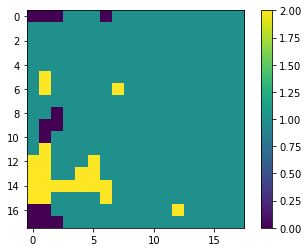

In [ ]:
plt.imshow(most_common_rotamers)

plt.colorbar()
plt.show()

Какие выводы можно сделать на основании изображения выше? Можно ли сказать, что какой-то ротамер характерен для определенной вторичной структуры?

# $\rightarrow$ Ваши идеи 🙂

## Задание 1.5. А насколько вообще состоятелен подход к поиску пересечений, основанный на энергии van der Waals?

Давайте возьмем достаточно длинный белок $1Z87$, откроем его и изучим:

In [ ]:
import Bio.PDB as pdb

In [ ]:
path = pdb.PDBList().retrieve_pdb_file("1z87", 
                                       file_format="pdb")
struct = pdb.PDBParser().get_structure("s", path)

Получите 0-ую цепочку этого белка, найдите в ней индексы всех цистеинов (CYS):

In [ ]:
chain = struct[0].child_list[0]
residues = chain.child_list
cys_inds = [i for i in range(len(chain)) 
            if residues[i].resname == "CYS"]

cys_inds

[15, 218, 231]

Выберите первый найденный цистеин. Будем менять для него угол $\chi_1$ и смотреть, как будет меняться энергия ван дер Ваальса при взаимодействии с другими атомами.

$U_{LJ} = 4 \cdot \epsilon \cdot [(\frac{r_{min}}{r})^{12} - 2 \cdot (\frac{r_{min}}{r})^6]$

In [ ]:
lj_coeffs = pd.read_csv("lennard-jones_12-6.csv", delimiter="\t")
lj_coeffs.head()

,atom_pair,reqm,eps
0,C-C,4,"0,15"
1,C-N,"3,75","0,155"
2,C-O,"3,6","0,173"
3,C-S,4,"0,173"
4,C-H,3,"0,055"


In [ ]:
def van_der_Waals(d, d_m, eps):
    return  4 * eps * (((d_m / d) ** 12) - 2 * ((d_m / d) ** 6))

Изменяя двугранный угол в пределах $[-\pi, \pi)$:
- Вычислите новые координаты атома SG у цистеина. Для этого можно воспользоваться функциями из файла geometry.py (из первого ДЗ).
- После получения координат, их можно присвоить с помощью метода:

    residue["CG"].set_coord(new_cg1_coord)
- После этого вычислите суммарную энергию ван дер Ваальса взаимодействия со всеми другими атомами белка.

In [ ]:
from geometry import *

Для удобства сделаем словарь из таблицы с коэффициентами потенциала типа Леннарда-Джонса:

In [ ]:
lj_coeffs = {row[0]: {"d_min": float(row[1].replace(",", ".")), 
                      "eps": float(row[2].replace(",", "."))} for row in lj_coeffs.values}
lj_coeffs

{'C-C': {'d_min': 4.0, 'eps': 0.15},
 'C-N': {'d_min': 3.75, 'eps': 0.155},
 'C-O': {'d_min': 3.6, 'eps': 0.173},
 'C-S': {'d_min': 4.0, 'eps': 0.173},
 'C-H': {'d_min': 3.0, 'eps': 0.055},
 'N-C': {'d_min': 3.75, 'eps': 0.155},
 'N-N': {'d_min': 3.5, 'eps': 0.16},
 'N-O': {'d_min': 3.35, 'eps': 0.179},
 'N-S': {'d_min': 3.75, 'eps': 0.179},
 'N-H': {'d_min': 2.75, 'eps': 0.057},
 'O-C': {'d_min': 3.6, 'eps': 0.173},
 'O-N': {'d_min': 3.35, 'eps': 0.179},
 'O-O': {'d_min': 3.2, 'eps': 0.2},
 'O-S': {'d_min': 3.6, 'eps': 0.2},
 'O-H': {'d_min': 2.6, 'eps': 0.063},
 'S-C': {'d_min': 4.0, 'eps': 0.173},
 'S-N': {'d_min': 3.75, 'eps': 0.179},
 'S-O': {'d_min': 3.6, 'eps': 0.2},
 'S-S': {'d_min': 4.0, 'eps': 0.2},
 'S-H': {'d_min': 3.0, 'eps': 0.063},
 'H-C': {'d_min': 3.0, 'eps': 0.055},
 'H-N': {'d_min': 2.75, 'eps': 0.057},
 'H-O': {'d_min': 2.6, 'eps': 0.063},
 'H-S': {'d_min': 3.0, 'eps': 0.063},
 'H-H': {'d_min': 2.0, 'eps': 0.02}}

In [ ]:
def calc_vdw_w_residue(ref_residue, residue):
    ref_atoms = [at 
                 for at in ref_residue.child_list 
                 if at not in ["C", "N", "CA", "CB", "O"] and at.element[0] != "H"]
    atoms = [at 
             for at in residue.child_list 
             if at.element[0] != "H"]
    
    ds, d_ms, epses = [], [], []
    for at1 in ref_atoms:
        for at2 in atoms:
            pair = "{}-{}".format(at1.element, at2.element)
            ds += [at1 - at2]
            d_ms += [lj_coeffs[pair]["d_min"]]
            epses += [lj_coeffs[pair]["eps"]]
            
    ds =    np.array(ds)
    d_ms =  np.array(d_ms)
    epses = np.array(epses)
    
    return van_der_Waals(ds, d_ms, epses).sum()
    

In [ ]:
calc_vdw_w_residue(chain[2], chain[3])

157461.58711262036

In [ ]:
chi1_vals = np.arange(-np.pi, np.pi, np.pi/10)

cys_residue = residues[cys_inds[0]]

chi1_true = pdb.calc_dihedral(cys_residue["N"].get_vector(),
                              cys_residue["CA"].get_vector(),
                              cys_residue["CB"].get_vector(),
                              cys_residue["SG"].get_vector(),                             
                             )
planar = pdb.calc_angle(cys_residue["CA"].get_vector(),
                      cys_residue["CB"].get_vector(),
                      cys_residue["SG"].get_vector())
bond = cys_residue["SG"] - cys_residue["CB"]
prev_atoms = np.array([cys_residue["N"].coord, 
                       cys_residue["CA"].coord, 
                       cys_residue["CB"].coord, 
                      ])

vdw_vals = []

for chi1 in chi1_vals:
    new_coord = place_next_dihedral_atom(prev_atoms, chi1, planar, bond)
    cys_residue["SG"].set_coord(new_coord)
    
    vdw_sum = 0
    for k in range(len(residues)):
        if k == cys_inds[0]:
            continue
        
        vdw_sum += calc_vdw_w_residue(cys_residue, residues[k])
    
    vdw_vals += [vdw_sum]

In [ ]:
vdw_vals

[316494.9523184376,
 316494.5906475801,
 316494.0557936428,
 316493.3601221039,
 316492.6451793587,
 316492.1638548957,
 316492.7847215147,
 316494.62898544566,
 316498.8750134653,
 316528.64588690334,
 316674.7817079464,
 316866.379632938,
 316733.97859090427,
 316602.96995293314,
 316560.22929701605,
 316511.4835754767,
 316493.01362402725,
 316491.72926439845,
 316493.66245639505,
 316494.8653508598]

Постройте график для получившихся значений энергии. Какой вывод можно сделать из него?

In [ ]:
chi1_true

-2.702528834068977

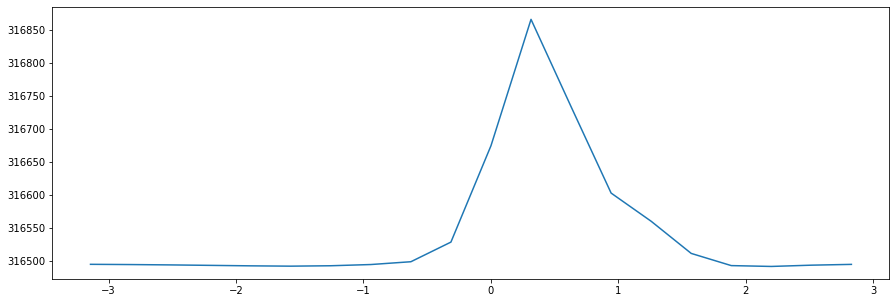

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(chi1_vals, vdw_vals)
#plt.plot([chi1_true, chi1_true], [0, max(vdw_vals)])
plt.show()

In [ ]:
# your ideas here

# Часть 2. Предсказание ротамеров $\chi_1$

В этой части Вам предстоит применить методы Машинного Обучения (деревья решений) к задаче предсказания ротамеров Вашей аминокислоты.

## Задание 2.1. Вернемся к датасету из части 1. Добавьте колонку chi_class, которая получается преобразованием значений из колонки chi_1 к классам.

In [2]:
import json
import pandas as pd
import numpy as np

In [1]:
amacid_names = ['ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'HIS', 'ILE', 'LEU',
                'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

print(f"Моя аминокислота - {np.random.choice(amacid_names)}")


Моя аминокислота - ASP


In [4]:
dpath = "ASP_data.csv"
df = pd.read_csv(dpath)

In [5]:
rotamers = np.array([60, -60, 180])
def get_class(value, rotamers):
    diffs = np.abs(value - rotamers)
    diffs = np.minimum(diffs, 360 - diffs)
    return np.argmin(diffs)
chi_class = []
for val in df["chi_1"]:
    chi_class += [get_class(val, rotamers)]
df.insert(1, 'chi_class', chi_class, allow_duplicates = False)

In [6]:
df

,Unnamed: 0,chi_class,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,0,1,2BO5,-66.725318,-28.027174,87.892905,38.745571,70,49,H,...,123.975091,19.291313,29.229187,106.452262,11.072507,36.244129,78.927467,25.548396,26.095122,70.583940
1,1,2,2BW2,-46.819010,-48.164891,94.082980,-112.929223,20,119,S,...,26.823775,93.206264,140.039328,66.270921,111.328368,126.782846,104.768989,76.649524,135.229071,133.673905
2,2,2,2BW2,-71.249169,149.975739,115.414191,-165.942046,22,117,-,...,154.190701,104.246350,80.992793,18.593460,54.366711,122.312555,60.485881,109.459464,133.648538,133.684752
3,3,2,2BW2,-62.603932,-33.242635,89.944486,48.700073,36,103,H,...,59.456278,75.295336,89.416390,112.482349,16.857069,11.022248,79.213611,72.080065,60.791826,128.120634
4,4,2,2BW2,-75.940690,-33.031491,88.163157,52.137527,37,102,H,...,86.355653,40.562595,34.308552,71.597636,16.485020,79.552805,79.901144,34.167471,89.233341,63.884644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15081,15081,1,3VZ6,57.176933,70.849660,103.884223,-149.262024,150,42,E,...,122.607387,35.271964,102.208235,95.947151,58.661851,91.587707,35.123654,62.974358,129.334550,80.408976
15082,15082,2,3VZ6,-65.992557,-35.756785,90.120885,59.044477,175,17,H,...,98.649904,46.270860,120.719277,67.786636,18.724456,90.198727,106.787576,4.413617,85.816061,91.818875
15083,15083,1,3VZ6,-63.715162,-39.583660,91.786450,51.697100,177,15,H,...,139.748566,91.864159,123.667569,138.571288,35.917595,120.856550,54.972255,49.869670,111.316196,139.753552
15084,15084,1,3VZ7,-78.264295,56.480215,101.492771,103.758705,12,180,S,...,69.411558,43.272913,98.847618,128.159101,29.136658,78.588225,119.062136,23.755879,102.600520,93.394436


## Задание 2.2. Теперь давайте дискретизируем значения $\phi, \psi, \alpha$. Каждому значению из $[-\pi, \pi]$ нужно поставить в соответствие номер блока длиной 20 градусов, в который он попадает.

## Задание 2.3. В датасете есть текстовые признаки! Так как они категориальные, их значения можно поменять на натуральные числа. Пронумеруйте все уникальные значения таких признаков и измените текстовые значения на соответствующие номера. 

**Комментарий**: обратите внимание, значения могут быть отрицательными. А номер блока нет 🤔

In [7]:
from sklearn.preprocessing import LabelEncoder
def changed(df, cols):
    for name in df.columns:
        if (type(df[name][0]) == str):
            le = LabelEncoder()
            le.fit(df[name])
            df[name] = le.transform(df[name])
        elif name in cols:
            df[name] = (df[[name]] + 180) // 20
            

In [8]:
changed(df, ['phi', 'psi', 'alpha'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15086 entries, 0 to 15085
Columns: 302 entries, Unnamed: 0 to gamma17
dtypes: float64(159), int64(143)
memory usage: 34.8 MB


## Задание 2.4. Обучим нашу модель!

Импортируйте библиотеку lightgbm. Если она не установлена, установить ее можно с помощью консольной команды pip:

In [10]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import lightgbm as lgb

In [12]:
X = df.drop(columns=['pbd_indx', 'Unnamed: 0', 'chi_1', 'chi_class'], axis = 1)
y = df[['chi_class']]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [40]:
 y.value_counts()

chi_class
1            6680
2            5936
0            2470
dtype: int64

Обучите модель, проверьте качество обучения на тестовой выборке (по метрике accuracy). Получилось ли хорошая модель?

In [50]:
 clf = lgb.LGBMClassifier(
                         num_leaves=88,
                         min_child_samples=1358,
                         max_depth=16,
                         n_estimators=2170,
                         reg_lambda=4702.599,
                         reg_alpha=28.532,
                         learning_rate=0.2461,
                         random_state=42
                        )

In [15]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(learning_rate=0.2461, max_depth=64, min_child_samples=1358,
               n_estimators=2170, num_leaves=88, random_state=42,
               reg_alpha=28.532, reg_lambda=4702.599)

In [18]:
from sklearn.metrics import accuracy_score
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train_pred, y_train)
print("Accuracy score: train - {0}, test - {1}".format(accuracy_score(y_train_pred, y_train), accuracy_score(y_test_pred, y_test)))

Accuracy score: train - 0.7324810606060606, test - 0.6878038002651348


Модель переобучилась. Точность модели средняя